In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
# short test

In [4]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [63]:
data['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

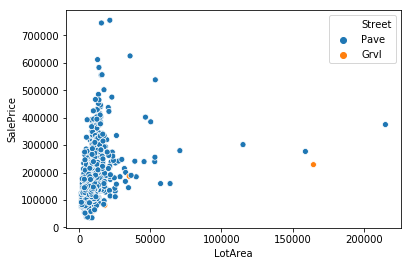

In [102]:
sns.scatterplot(x='LotArea',y='SalePrice',data=data,hue='Street')

Clearly there is correlation between the price and the size

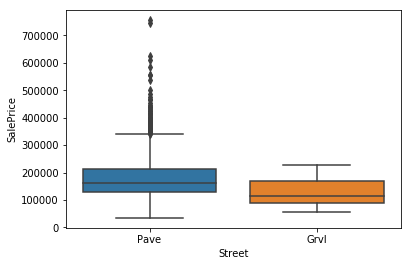

In [6]:
sns.boxplot(x='Street',y='SalePrice',data=data)

Gravel road decrease value, but:

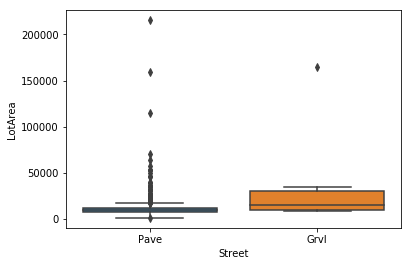

In [7]:
sns.boxplot(x='Street',y='LotArea',data=data)

It appears that bigger houses are generally more expensive, but houses with a gravel street are cheaper, and overall much bigger  
so I am trying to determine which would work better - price and street, or perhaps size_pave and size_grvl features

In [22]:
# I will try a very simple test, using a tree and linear regression (because it is simply and nonlinear)

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [25]:
tree = RandomForestRegressor(100)
reg = LinearRegression()

In [27]:
X = data[['LotArea','Street']]
X.loc[:,'Street'] = X['Street'].map({'Pave':0,'Grvl':1})
y = data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
tree.fit(X_train,y_train)
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
tree.score(X_test,y_test),reg.score(X_test,y_test)

(0.11228545862867456, 0.07870709057996539)

In [30]:
# option 2

In [32]:
X = data[['LotArea','Street']]
X['LotPave'] = np.where(X['Street']=='Pave', X['LotArea'], 0)
X['LotGravel'] = np.where(X['Street']=='Pave', 0, X['LotArea'])

/home/raphael/Software/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/raphael/Software/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
X = X[['LotPave','LotGravel']]
y = data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
tree.fit(X_train,y_train)
reg.fit(X_train,y_train)
tree.score(X_test,y_test), reg.score(X_test,y_test)

(0.07303797962056735, 0.07551037930178739)

Option 2, with a different feature for size of paved vs size of gravel, seems better

**Next**

In [103]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


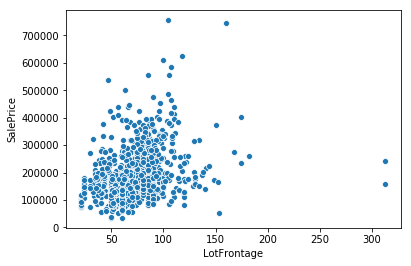

In [108]:
sns.scatterplot(x='LotFrontage',y='SalePrice',data=data)

['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
Norm      1445
Feedr        6
PosN         2
RRNn         2
Artery       2
PosA         1
RRAe         1
RRAn         1
Name: Condition2, dtype: int64


Text(0.5, 1.0, 'Cond2')

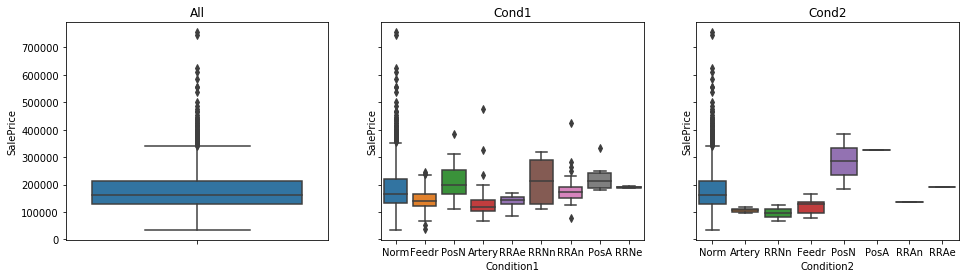

In [48]:
curr = 'Condition2'
print(data[curr].unique())
print(data[curr].value_counts())
fig,axes = plt.subplots(ncols=3,figsize=(16,4),sharey=True)
sns.boxplot(x=curr,y='SalePrice',data=data.fillna('nan'),ax=axes[2])
sns.boxplot(x='Condition1',y='SalePrice',data=data.fillna('nan'),ax=axes[1])
sns.boxplot(y='SalePrice',data=data,ax=axes[0])
axes[0].set_title('All')
axes[1].set_title('Cond1')
axes[2].set_title('Cond2')

Norm is the default and behaves like the average

### Rigorous boxplotting:


############
Id
############


############
MSSubClass
############

[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64


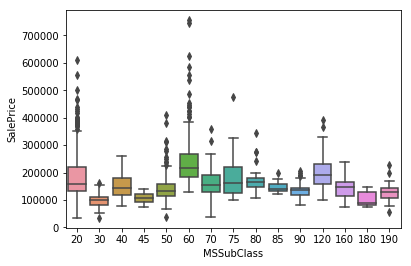


############
MSZoning
############

['RL' 'RM' 'C (all)' 'FV' 'RH']
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


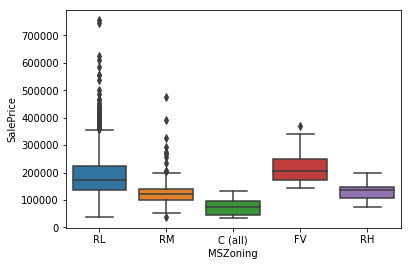


############
LotFrontage
############


############
LotArea
############


############
Street
############

['Pave' 'Grvl']
Pave    1454
Grvl       6
Name: Street, dtype: int64


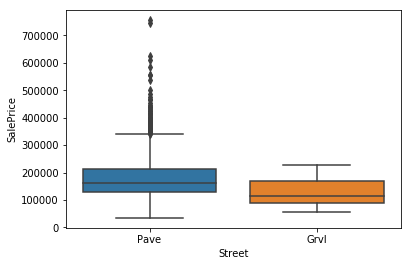


############
Alley
############

[nan 'Grvl' 'Pave']
Grvl    50
Pave    41
Name: Alley, dtype: int64


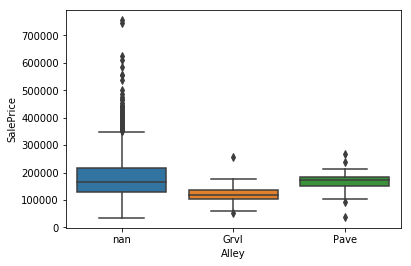


############
LotShape
############

['Reg' 'IR1' 'IR2' 'IR3']
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64


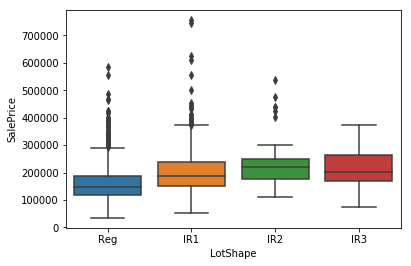


############
LandContour
############

['Lvl' 'Bnk' 'Low' 'HLS']
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64


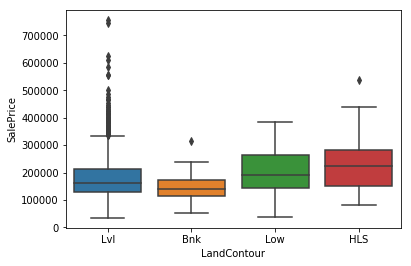


############
Utilities
############

['AllPub' 'NoSeWa']
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


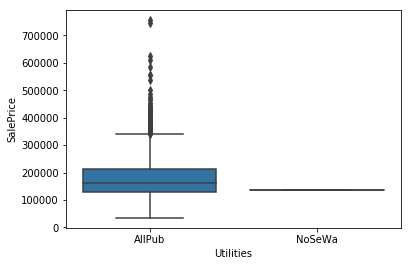


############
LotConfig
############

['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64


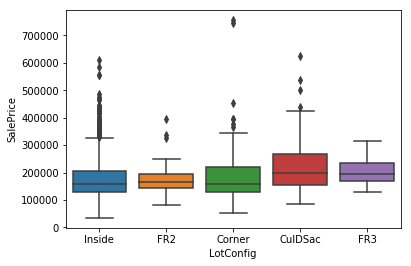


############
LandSlope
############

['Gtl' 'Mod' 'Sev']
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64


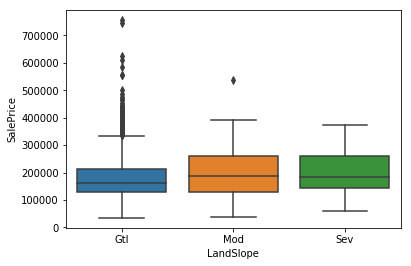


############
Neighborhood
############


############
Condition1
############

['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64


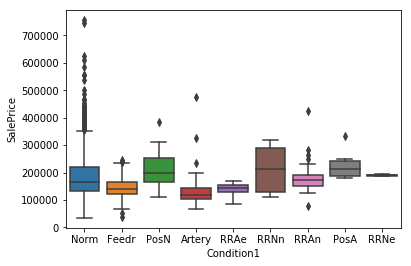


############
Condition2
############

['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
Norm      1445
Feedr        6
PosN         2
RRNn         2
Artery       2
PosA         1
RRAe         1
RRAn         1
Name: Condition2, dtype: int64


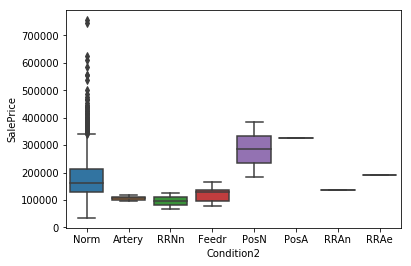


############
BldgType
############

['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64


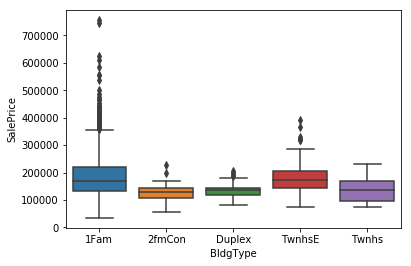


############
HouseStyle
############

['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64


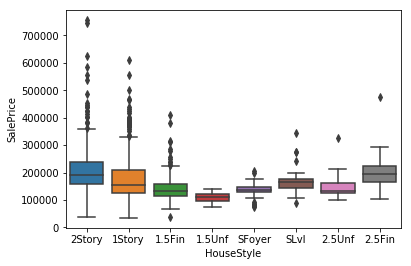


############
OverallQual
############

[ 7  6  8  5  9  4 10  3  1  2]
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64


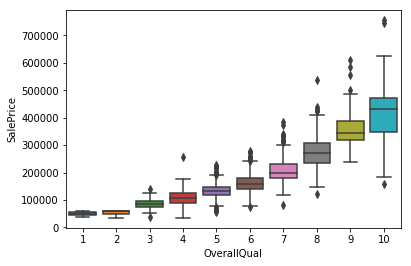


############
OverallCond
############

[5 8 6 7 4 2 3 9 1]
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64


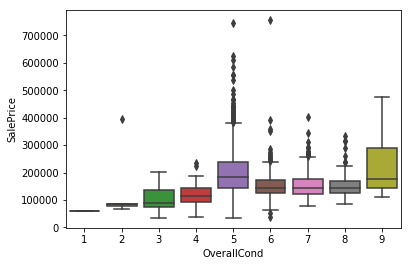


############
YearBuilt
############


############
YearRemodAdd
############


############
RoofStyle
############

['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64


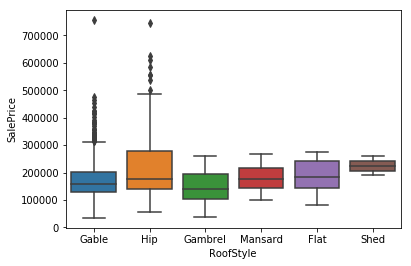


############
RoofMatl
############

['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Roll          1
Membran       1
ClyTile       1
Metal         1
Name: RoofMatl, dtype: int64


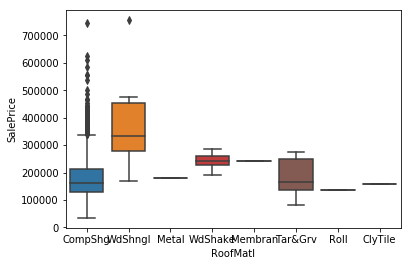


############
Exterior1st
############

['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
ImStucc      1
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64


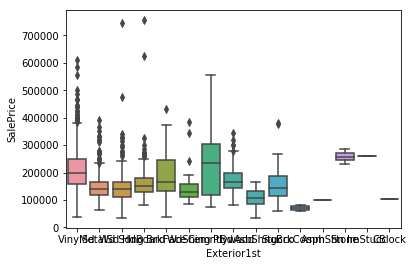


############
Exterior2nd
############

['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock']
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64


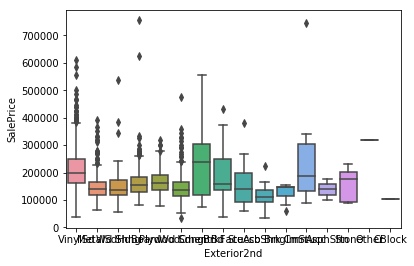


############
MasVnrType
############

['BrkFace' 'None' 'Stone' 'BrkCmn' nan]
None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64


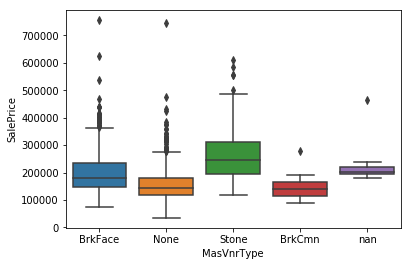


############
MasVnrArea
############


############
ExterQual
############

['Gd' 'TA' 'Ex' 'Fa']
TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64


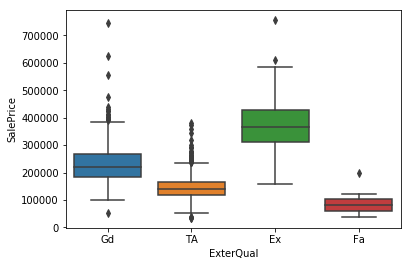


############
ExterCond
############

['TA' 'Gd' 'Fa' 'Po' 'Ex']
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64


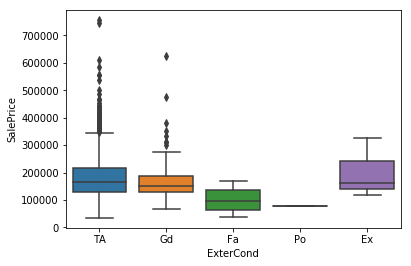


############
Foundation
############

['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'Stone']
PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64


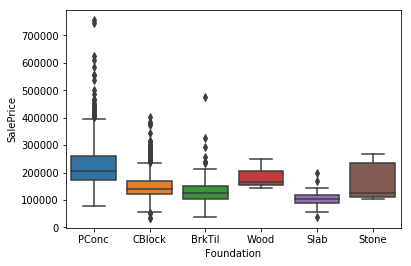


############
BsmtQual
############

['Gd' 'TA' 'Ex' nan 'Fa']
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64


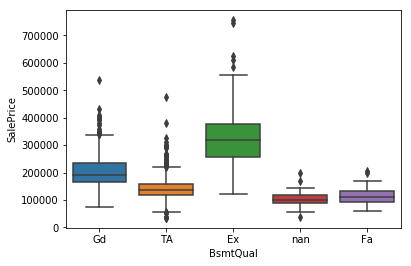


############
BsmtCond
############

['TA' 'Gd' nan 'Fa' 'Po']
TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64


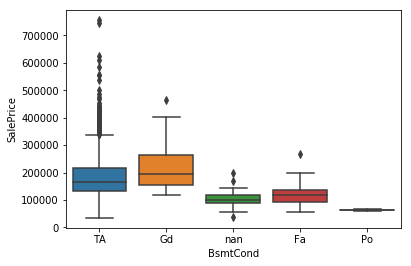


############
BsmtExposure
############

['No' 'Gd' 'Mn' 'Av' nan]
No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64


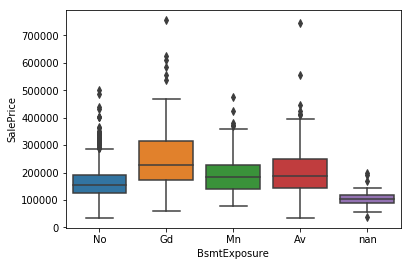


############
BsmtFinType1
############

['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64


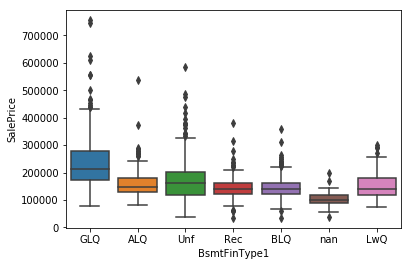


############
BsmtFinSF1
############


############
BsmtFinType2
############

['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64


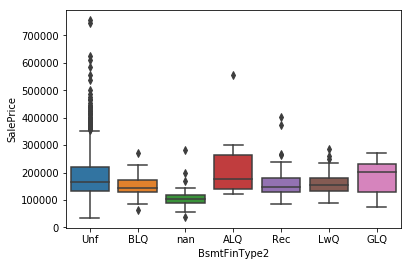


############
BsmtFinSF2
############


############
BsmtUnfSF
############


############
TotalBsmtSF
############


############
Heating
############

['GasA' 'GasW' 'Grav' 'Wall' 'OthW' 'Floor']
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64


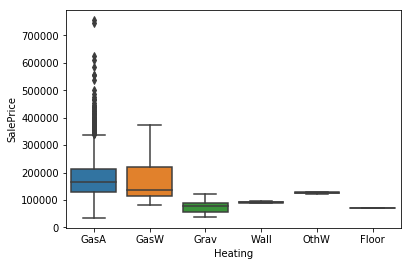


############
HeatingQC
############

['Ex' 'Gd' 'TA' 'Fa' 'Po']
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64


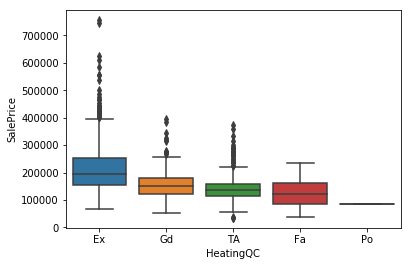


############
CentralAir
############

['Y' 'N']
Y    1365
N      95
Name: CentralAir, dtype: int64


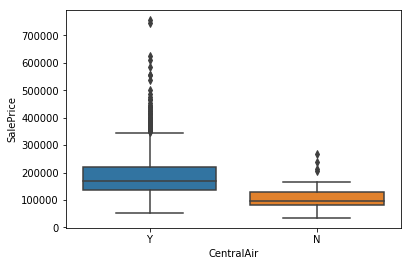


############
Electrical
############

['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


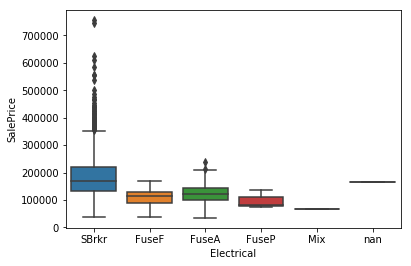


############
1stFlrSF
############


############
2ndFlrSF
############


############
LowQualFinSF
############


############
GrLivArea
############


############
BsmtFullBath
############

[1 0 2 3]
0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64


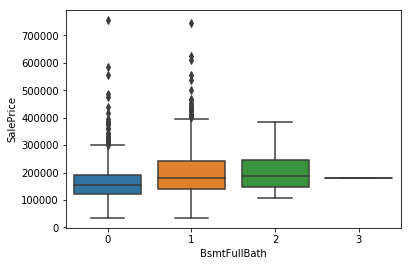


############
BsmtHalfBath
############

[0 1 2]
0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64


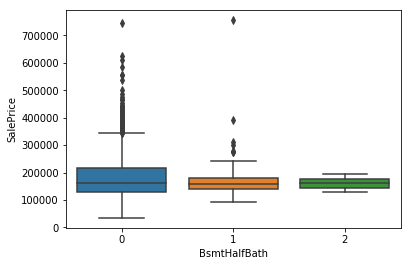


############
FullBath
############

[2 1 3 0]
2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64


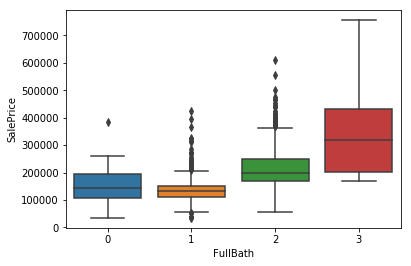


############
HalfBath
############

[1 0 2]
0    913
1    535
2     12
Name: HalfBath, dtype: int64


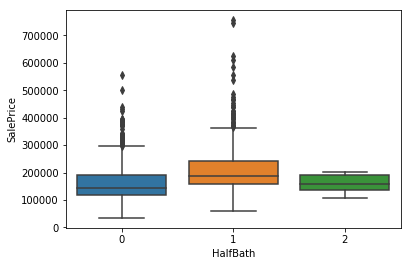


############
BedroomAbvGr
############

[3 4 1 2 0 5 6 8]
3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64


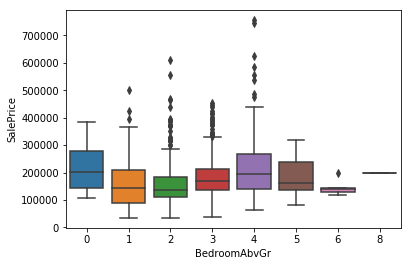


############
KitchenAbvGr
############

[1 2 3 0]
1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64


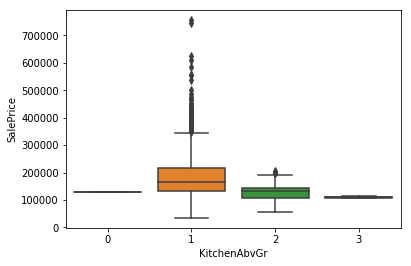


############
KitchenQual
############

['Gd' 'TA' 'Ex' 'Fa']
TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64


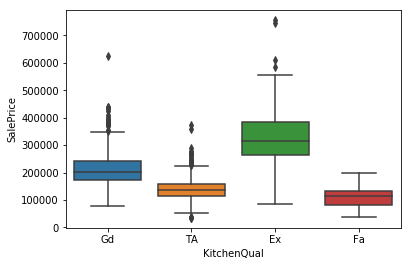


############
TotRmsAbvGrd
############

[ 8  6  7  9  5 11  4 10 12  3  2 14]
6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
14      1
2       1
Name: TotRmsAbvGrd, dtype: int64


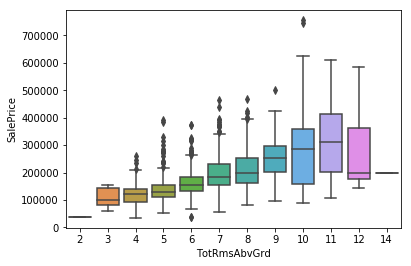


############
Functional
############

['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev']
Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64


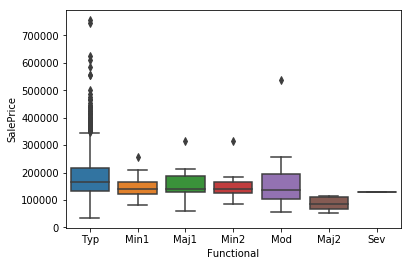


############
Fireplaces
############

[0 1 2 3]
0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64


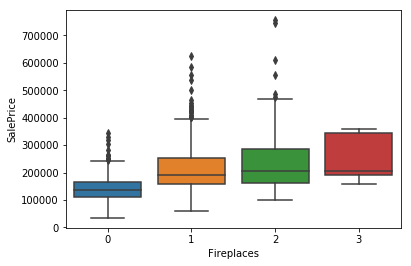


############
FireplaceQu
############

[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64


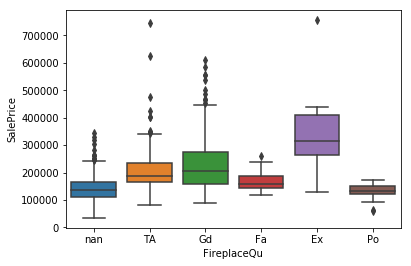


############
GarageType
############

['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64


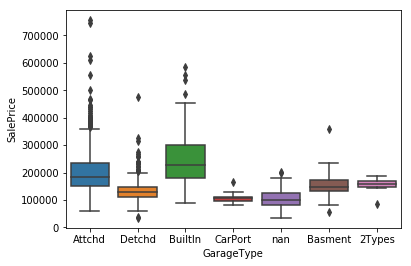


############
GarageYrBlt
############


############
GarageFinish
############

['RFn' 'Unf' 'Fin' nan]
Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64


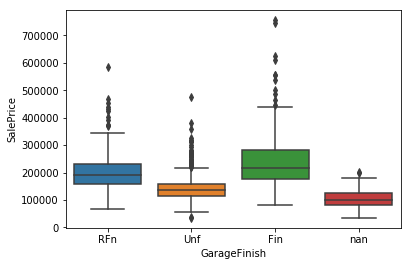


############
GarageCars
############

[2 3 1 0 4]
2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64


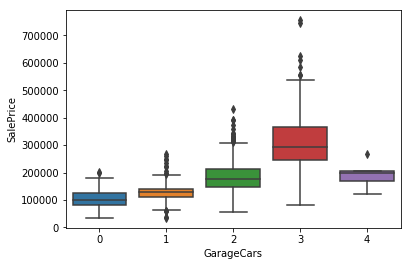


############
GarageArea
############


############
GarageQual
############

['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64


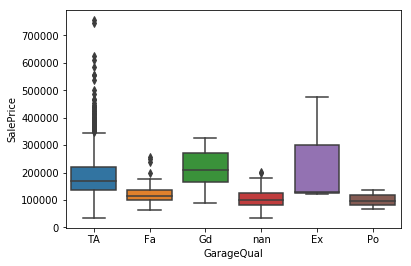


############
GarageCond
############

['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64


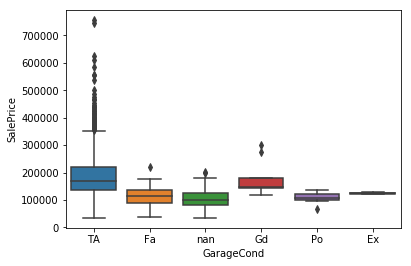


############
PavedDrive
############

['Y' 'N' 'P']
Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64


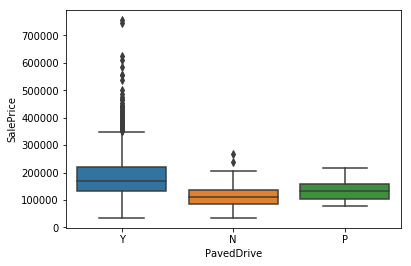


############
WoodDeckSF
############


############
OpenPorchSF
############


############
EnclosedPorch
############


############
3SsnPorch
############


############
ScreenPorch
############


############
PoolArea
############

[  0 512 648 576 555 480 519 738]
0      1453
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64


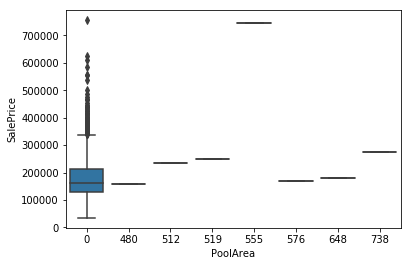


############
PoolQC
############

[nan 'Ex' 'Fa' 'Gd']
Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64


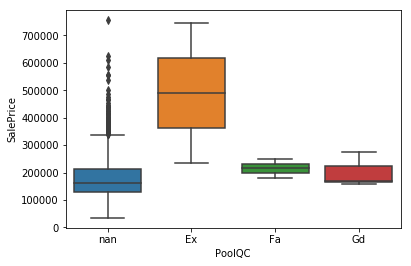


############
Fence
############

[nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64


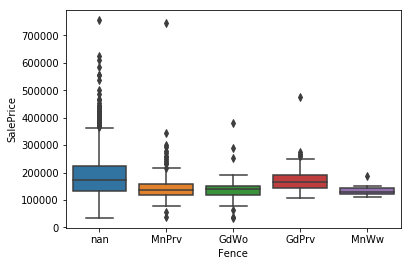


############
MiscFeature
############

[nan 'Shed' 'Gar2' 'Othr' 'TenC']
Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64


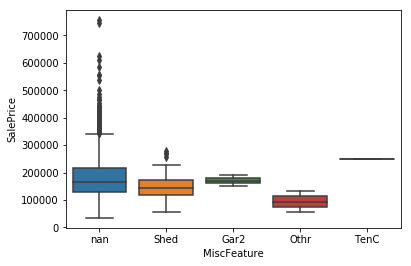


############
MiscVal
############


############
MoSold
############

[ 2  5  9 12 10  8 11  4  1  7  3  6]
6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64


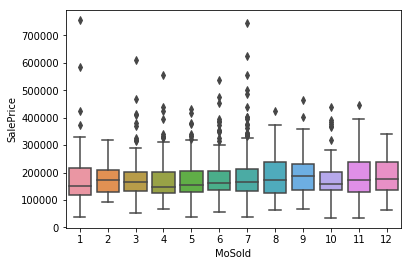


############
YrSold
############

[2008 2007 2006 2009 2010]
2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64


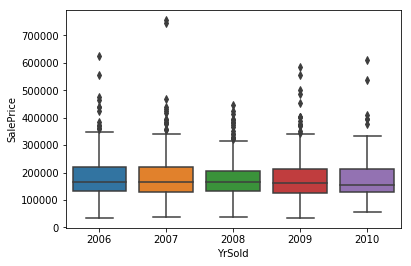


############
SaleType
############

['WD' 'New' 'COD' 'ConLD' 'ConLI' 'CWD' 'ConLw' 'Con' 'Oth']
WD       1267
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64


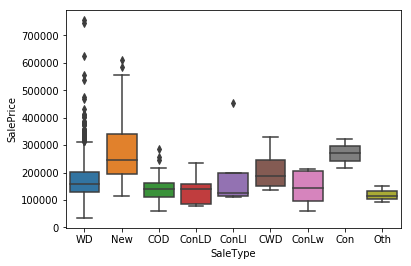


############
SaleCondition
############

['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloca' 'Family']
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64


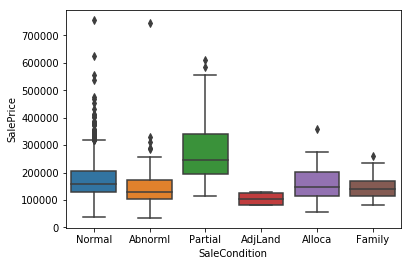


############
SalePrice
############



In [5]:
for curr in data.columns:
    print('')
    print('############')
    print(curr)
    print('############')
    print('')
    n = data[curr].nunique()
    if (n<20):
        print(data[curr].unique())
        print(data[curr].value_counts())
        sns.boxplot(x=curr,y='SalePrice',data=data.fillna('nan'))
        plt.show()
    else:
        pass

### Conclusions - mid:

In [19]:
print(data[(data['PoolArea']>0)]['SalePrice'].mean())
print(data['SalePrice'].mean())

288138.5714285714
180921.19589041095


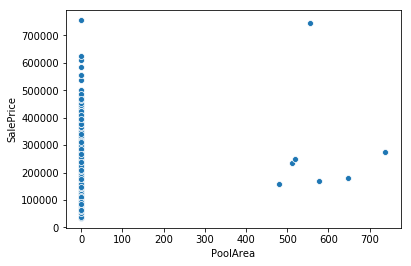

In [21]:
sns.scatterplot(x='PoolArea',y='SalePrice',data=data)

There doesn't seem to be a very strong correlation between the pool size and the price, but the presence of a pool does matter. I will try to change this to a flag

**Closer look at several**

(0, 400000)

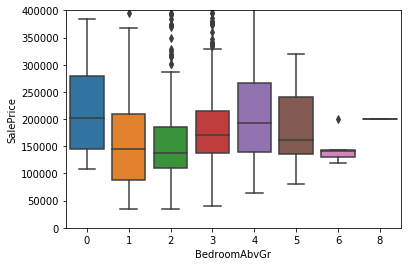

In [52]:
sns.boxplot(x='BedroomAbvGr',y='SalePrice',data=data.fillna('nan'))
plt.ylim(0,400000)

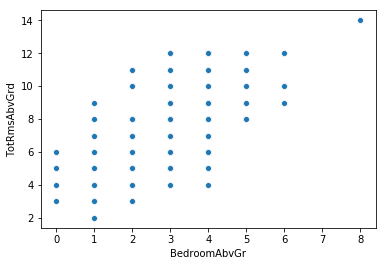

In [53]:
sns.scatterplot(x='BedroomAbvGr',y='TotRmsAbvGrd',data=data.fillna('nan'))

BedroomAbvGr maybe use truncated at 4

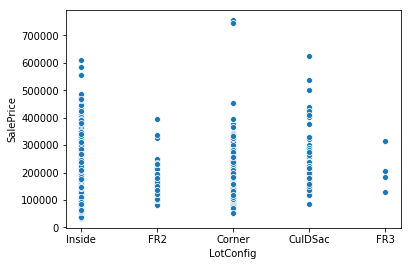

In [61]:
sns.scatterplot(x='LotConfig',y='SalePrice',data=data.fillna('nan'))
#plt.ylim(80000,300000)

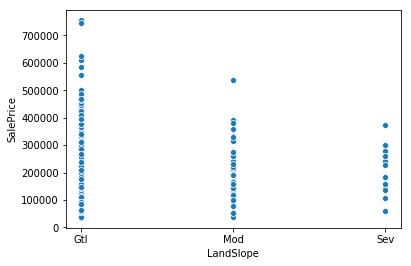

In [64]:
sns.scatterplot(x='LandSlope',y='SalePrice',data=data.fillna('nan'))

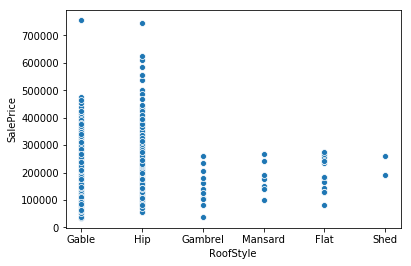

In [65]:
sns.scatterplot(x='RoofStyle',y='SalePrice',data=data.fillna('nan'))

bin the lower 4 into one flag

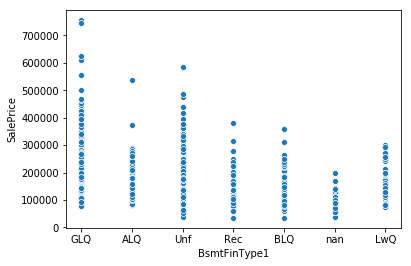

In [66]:
sns.scatterplot(x='BsmtFinType1',y='SalePrice',data=data.fillna('nan'))

Try binning

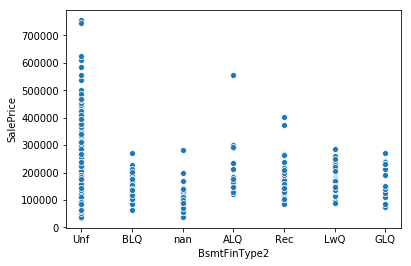

In [67]:
sns.scatterplot(x='BsmtFinType2',y='SalePrice',data=data.fillna('nan'))

Bin all but Unf

In [69]:
data['HalfBath'].value_counts()

0    913
1    535
2     12
Name: HalfBath, dtype: int64

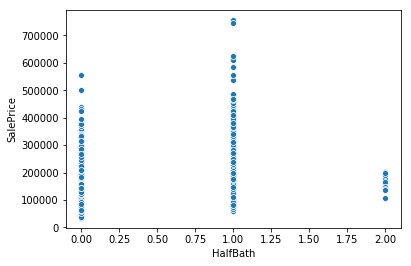

In [68]:
sns.scatterplot(x='HalfBath',y='SalePrice',data=data.fillna('nan'))

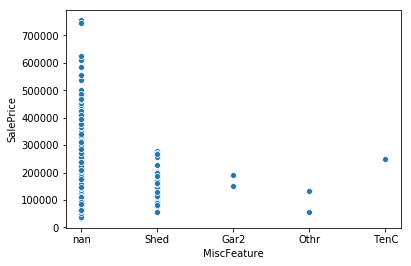

In [70]:
sns.scatterplot(x='MiscFeature',y='SalePrice',data=data.fillna('nan'))

Try binning

### Rest of the features

Id


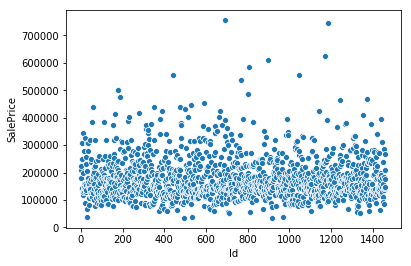

LotFrontage


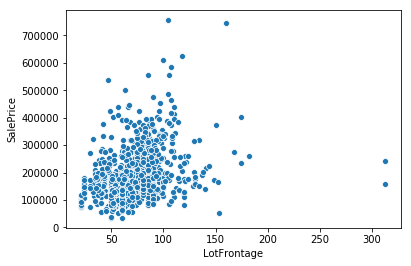

LotArea


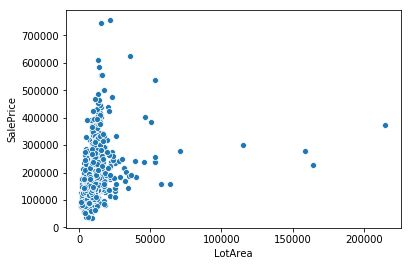

Neighborhood


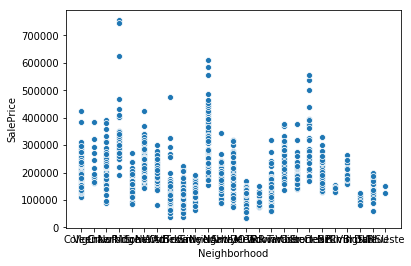

YearBuilt


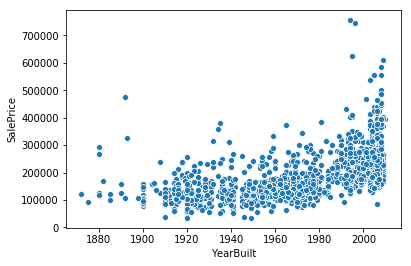

YearRemodAdd


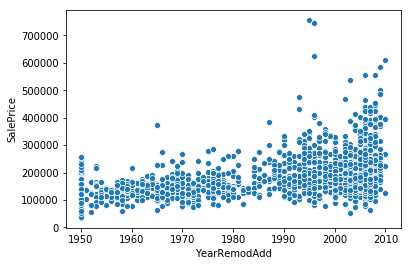

MasVnrArea


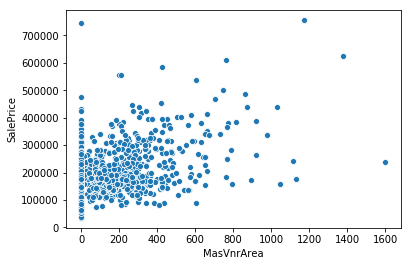

BsmtFinSF1


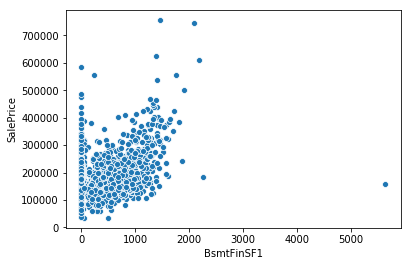

BsmtFinSF2


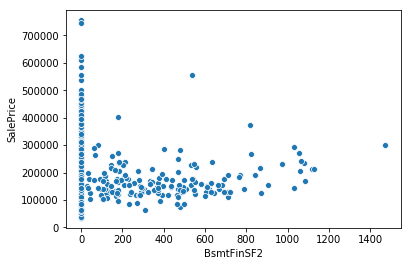

BsmtUnfSF


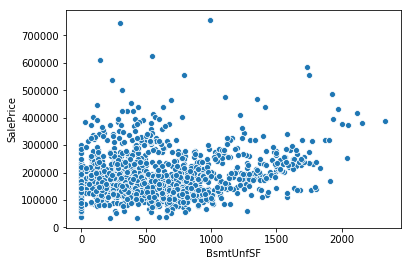

TotalBsmtSF


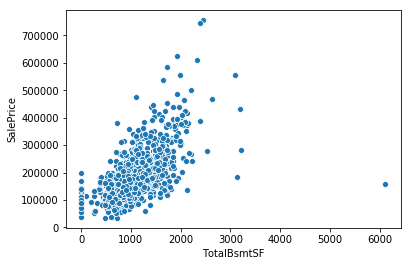

1stFlrSF


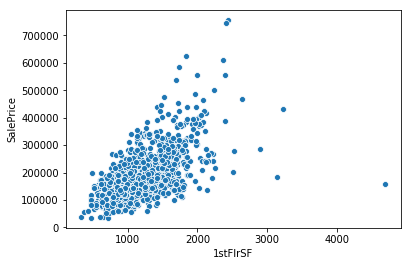

2ndFlrSF


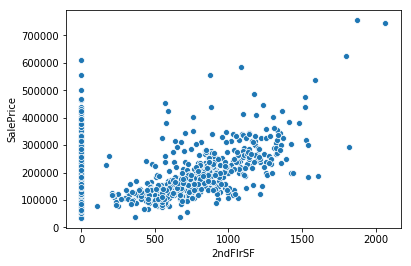

LowQualFinSF


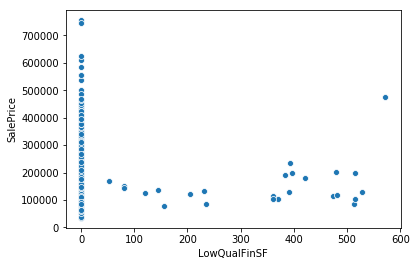

GrLivArea


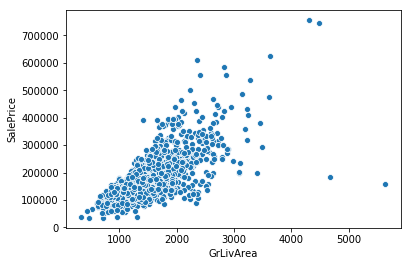

GarageYrBlt


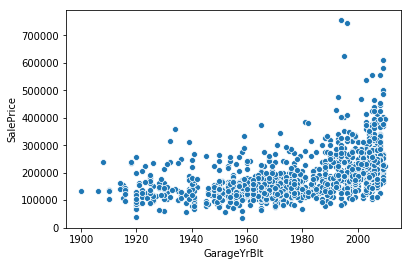

GarageArea


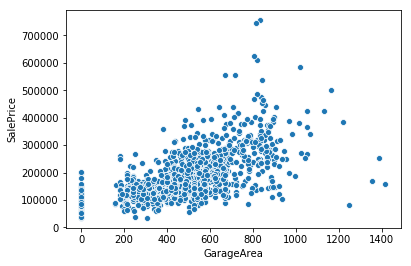

WoodDeckSF


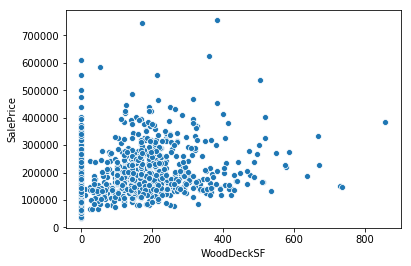

OpenPorchSF


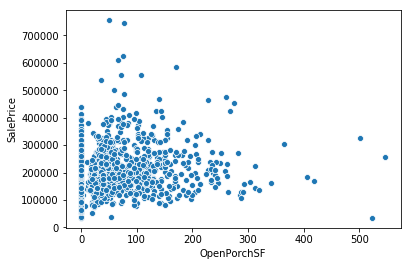

EnclosedPorch


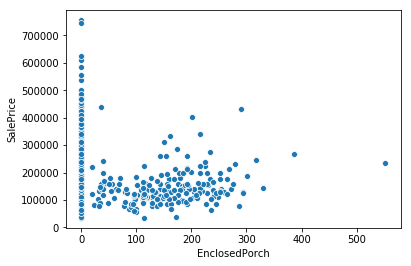

3SsnPorch


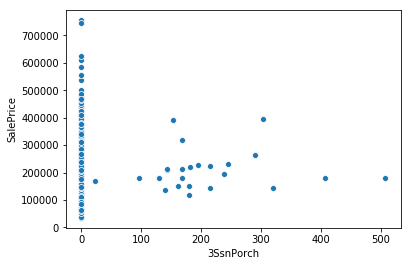

ScreenPorch


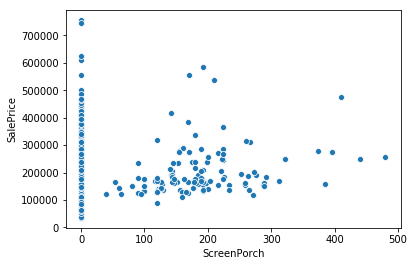

MiscVal


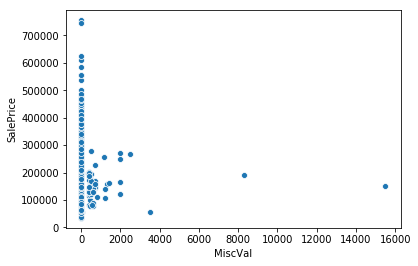

SalePrice


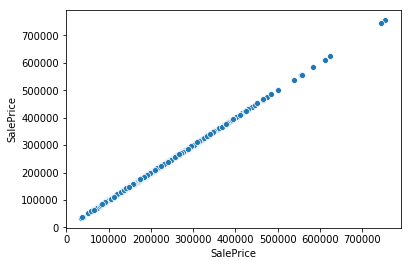

In [73]:
for curr in data.columns:
    n = data[curr].nunique()
    if (n>=20):
        print(curr)
        sns.scatterplot(x=curr,y='SalePrice',data=data.fillna('nan'))
        plt.show()

### Conclusions - second half

Probably linear:
LotFrontage, LotArea, MasVnrArea, BsmtFinSF1, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, GrLivArea, GarageArea, WoodDeckSF, OpenPorchSF, ScreenPorch,  

Neighborhood - categorial

YearBuilt - transform
YearRemodAdd - transform
BsmtFinSF2 - maybe
BsmtUnfSF
GarageYrBlt

LowQualFinSF? EnclosedPorch? 3SsnPorch? MiscVal

In [80]:
curr = 'LowQualFinSF'
print(round(data[data[curr]==0]['SalePrice'].mean()), round(data[data[curr]==0]['SalePrice'].std()))
print(round(data[data[curr]>0]['SalePrice'].mean()), round(data[data[curr]>0]['SalePrice'].std()))

181434 79415
152652 77269


In [81]:
curr = 'EnclosedPorch'
print(round(data[data[curr]==0]['SalePrice'].mean()), round(data[data[curr]==0]['SalePrice'].std()))
print(round(data[data[curr]>0]['SalePrice'].mean()), round(data[data[curr]>0]['SalePrice'].std()))

186857 80573
145193 61255


In [82]:
curr = '3SsnPorch'
print(round(data[data[curr]==0]['SalePrice'].mean()), round(data[data[curr]==0]['SalePrice'].std()))
print(round(data[data[curr]>0]['SalePrice'].mean()), round(data[data[curr]>0]['SalePrice'].std()))

180449 79498
209188 72047


In [83]:
curr = 'MiscVal'
print(round(data[data[curr]==0]['SalePrice'].mean()), round(data[data[curr]==0]['SalePrice'].std()))
print(round(data[data[curr]>0]['SalePrice'].mean()), round(data[data[curr]>0]['SalePrice'].std()))

181965 80057
152666 53722


Maybe only as flags